In [1]:
class Config:
    def __init__(self, imgsz=640, rect=False, cache=None, single_cls=False, fraction=1.0,task='detect',
                 classes=None,mosaic= 1.0,mixup=0.0,copy_paste= 0.0,degrees= 0.0,translate= 0.1,scale= 0.5,shear= 0.0,
                perspective= 0.0,flipud= 0.0,fliplr= 0.5,hsv_v= 0.4,hsv_s= 0.7,hsv_h= 0.015,mask_ratio= 4,overlap_mask= True
                ):
        self.imgsz = imgsz
        self.rect = rect
        self.cache = cache
        self.single_cls = single_cls
        self.fraction = fraction
        self.task = task
        self.classes = classes
        self.mosaic=mosaic
        self.mixup=mixup
        self.copy_paste =copy_paste
        self.degrees=degrees
        self.translate=translate
        self.scale=scale
        self.shear=shear
        self.perspective=perspective
        self.flipud=flipud
        self.fliplr=fliplr
        self.hsv_v=hsv_v
        self.hsv_s=hsv_s
        self.hsv_h=hsv_h
        self.mask_ratio=mask_ratio
        self.overlap_mask=overlap_mask

In [25]:
from ultralytics.data.utils import check_cls_dataset, check_det_dataset
from ultralytics.data import build_dataloader, build_yolo_dataset

data = check_det_dataset('E:\\code\\ultralytics\\ultralytics\\cfg\\datasets\\udacity.yaml')
trainset = data["train"]
cfg = Config()
#img_path = ['E:\\Datasets\\VOC\\images\\train2012', 'E:\\Datasets\\VOC\\images\\train2007', 'E:\\Datasets\\VOC\\images\\val2012', 'E:\\Datasets\\VOC\\images\\val2007']
#img_path = 'E:\\Datasets\\coco\\images\\train2017'
img_path = r'E:\Datasets\udacity\images'
trainer = build_yolo_dataset(cfg,img_path,2,data,"train",False,32)
train_loader = build_dataloader(trainer,2,16,False,-1)

train: Scanning E:\Datasets\udacity\labels.cache... 9218 images, 202 backgrounds, 4 corrupt: 100%|██████████| 9420/9420 [00:00<?, ?it/s]

train: WARNING ⚠️ E:\Datasets\udacity\images\1479498564477313399.jpg: ignoring corrupt image/label: negative label values [-0.00083333]
train: WARNING ⚠️ E:\Datasets\udacity\images\1479498820473341507.jpg: ignoring corrupt image/label: negative label values [-0.00083333]
train: WARNING ⚠️ E:\Datasets\udacity\images\1479499937073018706.jpg: ignoring corrupt image/label: negative label values [-0.00083333]
train: WARNING ⚠️ E:\Datasets\udacity\images\1479505030914958665.jpg: ignoring corrupt image/label: negative label values [-0.00083333]


In [26]:
import numpy as np
boxes = np.concatenate([lb["bboxes"] for lb in train_loader.dataset.labels], 0)
cls = np.concatenate([lb["cls"] for lb in train_loader.dataset.labels], 0)
cls = cls.squeeze()
names=data["names"]

In [27]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from ultralytics.utils.plotting import Colors
import matplotlib as mpl
colors = Colors()

In [28]:
# Plot dataset labels
nc = int(cls.max() + 1)  # number of classes
boxes = boxes[:1000000]  # limit to 1M boxes
x = pd.DataFrame(boxes, columns=["x", "y", "width", "height"])

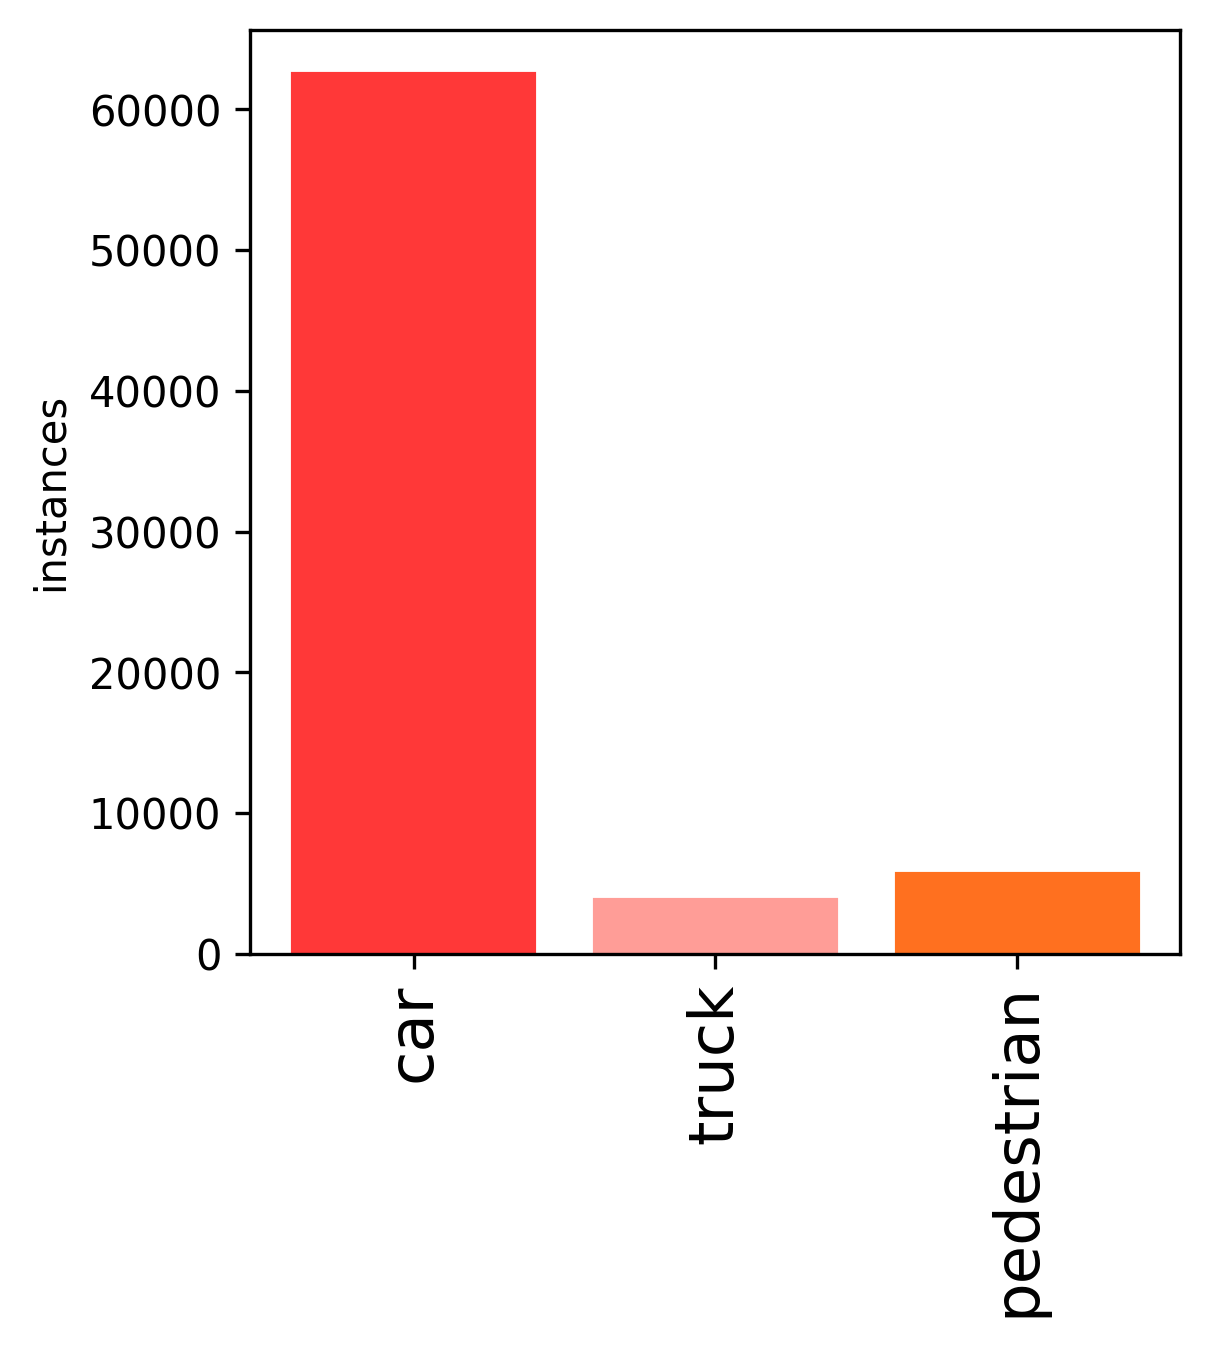

In [29]:
mpl.rcParams['figure.dpi'] = 300
plt.figure(figsize=(4,4))
ax = plt.axes()
# 绘制直方图
y = ax.hist(cls, bins=np.linspace(0, nc, nc + 1) - 0.5, rwidth=0.8)
# 为直方条设置颜色
for i in range(nc):
    y[2].patches[i].set_color([x / 255 for x in colors(i)])
# 设置坐标轴标签
ax.set_ylabel("instances")
if 0 < len(names) < 100:
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(list(names.values()), rotation=90, fontsize=15)
else:
    ax.set_xlabel("classes")
plt.show()